### What is Time Series?
** A time series is a set of observations taken at specified times usually at equal intervals.                                        
** It is used to predict future values based on previous observed values.

### Components of Time Series

* Trend
* Seasonality
* Irregularity
* Cyclic

### When not to use Time Series?

* Values are constant
* Values in form of function

### What is Stationarity?

Stationarity have very strict criteria TS must have following things:
* Constant Mean
* Constant Variance
* Autocovariance doesnot depend on time

### Tests to Check Stationarity
1) Rolling Statistics:Plot moving average or moving variance and have insights whether it varies with time

2) ADCF(Augmented Dickey-fuller) Test: Null Hypothesis is that TS is nonstationary.The test results comprise of a test statistic & some critical values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,4

In [2]:
dataset=pd.read_csv("HBL Historical Data.csv",index_col=[0],parse_dates=[0])
dataset.head()

,Closing Price
Daily,
2020-11-20,130.34
2020-11-19,131.50
2020-11-18,129.90
2020-11-17,131.00
2020-11-16,130.50


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
series_values=dataset.values

In [5]:
type(series_values)

numpy.ndarray

In [6]:
dataset.size           

716

In [7]:
dataset.describe()

,Closing Price
count,716.000000
mean,142.927975
std,29.839126
min,95.000000
25%,123.187500
50%,135.070000
75%,161.110000
max,219.000000


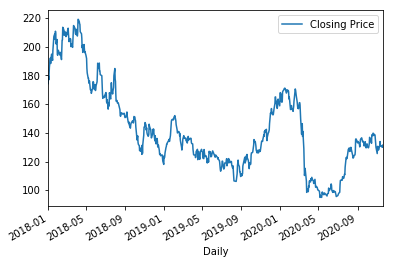

In [8]:
dataset.plot()

In [9]:
dataset_mean=dataset.rolling(window=70).mean()

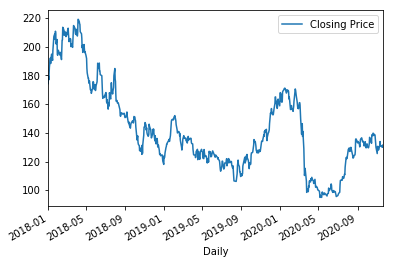

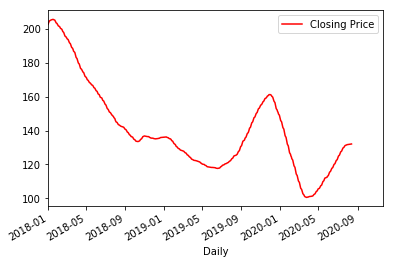

In [10]:
dataset.plot()
dataset_mean.plot(color='red')

In [11]:
#As we can see there is alot of noise from the graph of moving averages

In [12]:
dataset_df=pd.concat([dataset,dataset.shift(1)],axis=1)

In [13]:
dataset_df.head()

,Closing Price,Closing Price
Daily,,
2020-11-20,130.34,NaN
2020-11-19,131.50,130.34
2020-11-18,129.90,131.50
2020-11-17,131.00,129.90
2020-11-16,130.50,131.00


In [14]:
dataset_df.columns=['Actual_Price','Forecasted_Price']
dataset_df.head()

,Actual_Price,Forecasted_Price
Daily,,
2020-11-20,130.34,NaN
2020-11-19,131.50,130.34
2020-11-18,129.90,131.50
2020-11-17,131.00,129.90
2020-11-16,130.50,131.00


In [15]:
price_df=dataset_df[1:]

In [16]:
from sklearn.metrics import mean_squared_error
price_error=mean_squared_error(price_df.Actual_Price,price_df.Forecasted_Price)

In [17]:
price_error

8.718798741258745

In [18]:
np.sqrt(price_error) #if this is so large we need to identify outliers and must have to remove inorder to least the error value

2.952761206270962

In [19]:
#this is our baseline model which says that price of 2 everyday so it reflects whatever advance model you are going to use
#your error should go down to this error

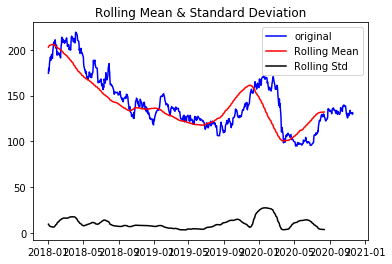

Results of dickey-fuller test
Test Statistics                 -1.254171
p-value                          0.649870
lags used                        1.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [20]:
#Determing rolling statistics
rolmean=dataset.rolling(window=70).mean()
rolstd=dataset.rolling(window=70).std()
#print(rolmean,rolstd)

#plot rolling statistics
orig=plt.plot(dataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of dickey-fuller test')
dftest=adfuller(dataset['Closing Price'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
                 

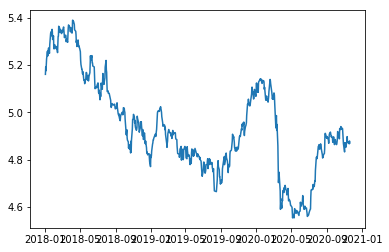

In [21]:
#Estimating Trend
dataset_logScale=np.log(dataset)
plt.plot(dataset_logScale)

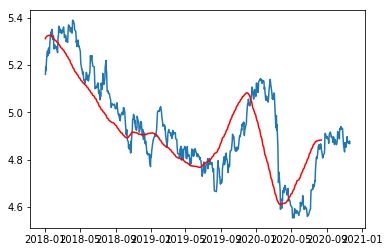

In [22]:
movingAverage=dataset_logScale.rolling(window=70).mean()
movingSTD=dataset_logScale.rolling(window=70).std()
plt.plot(dataset_logScale)
plt.plot(movingAverage,color='red')

In [23]:
datasetlogScaleMinusmovingAverage=dataset_logScale-movingAverage
datasetlogScaleMinusmovingAverage.head(20)

#Removing Nan Values
datasetlogScaleMinusmovingAverage.dropna(inplace=True)
datasetlogScaleMinusmovingAverage.head(20)

,Closing Price
Daily,
2020-08-13,-0.034504
2020-08-12,-0.023893
2020-08-11,-0.015913
2020-08-10,-0.034295
2020-08-07,-0.037781
2020-08-06,-0.018177
2020-08-05,-0.021444
2020-08-04,-0.023907
2020-08-03,-0.024869


In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    movingAverage=timeseries.rolling(window=70).mean()
    movingSTD=timeseries.rolling(window=70).std()
    
    #PLOT Rolling Statistics
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of dickey-fuller test')
    dftest=adfuller(timeseries['Closing Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    

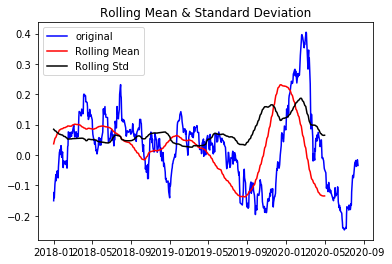

Results of dickey-fuller test
Test Statistics                 -2.124858
p-value                          0.234637
lags used                        1.000000
number of observations used    645.000000
Critical Value (1%)             -3.440529
Critical Value (5%)             -2.866031
Critical Value (10%)            -2.569162
dtype: float64


In [25]:
test_stationarity(datasetlogScaleMinusmovingAverage)

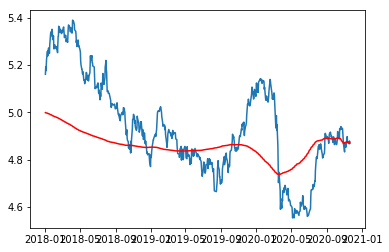

In [26]:
exponentialDecayWeightedAverage=dataset_logScale.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(dataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

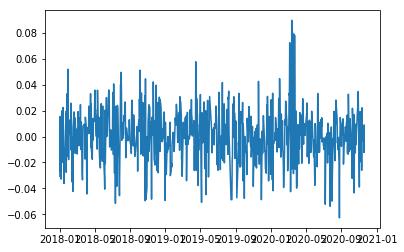

In [27]:
datasetLogDiffShifting=dataset_logScale-dataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

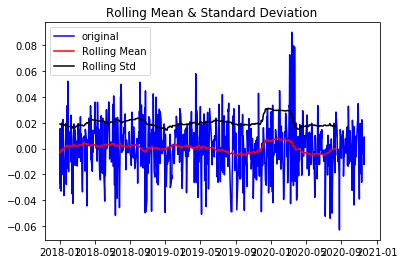

Results of dickey-fuller test
Test Statistics                -24.641846
p-value                          0.000000
lags used                        0.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [28]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

#### ARIMA(AUTOREGRESSIVE MOVING AVERAGE MODEL)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

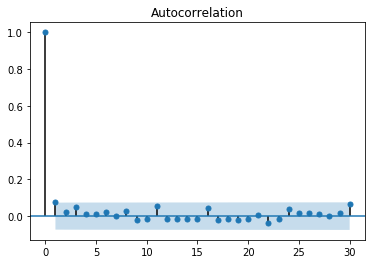

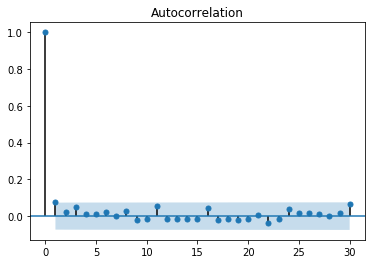

In [57]:
#plot_acf is to identify parameter Q
#plot_pacf is to identify parameter P
plot_acf(datasetLogDiffShifting,lags=30)

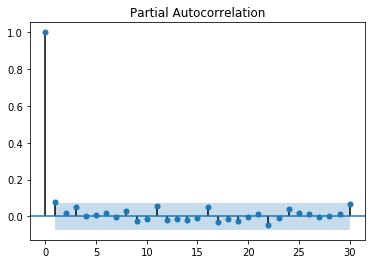

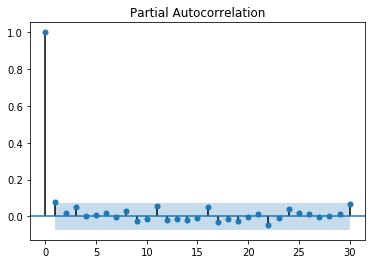

In [58]:
plot_pacf(datasetLogDiffShifting,lags=30)

In [59]:
#p=1,3 d=0,1,2 #q=1,3

In [60]:
dataset.size

716

In [90]:
price_train=dataset[0:358]
price_test=dataset[358:716]

In [91]:
price_train.size

358

In [92]:
price_test.size

358

In [93]:
from statsmodels.tsa.arima_model import ARIMA
dataset_model=ARIMA(price_train,order=(1,2,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [94]:
dataset_model_fit=dataset_model.fit()

In [95]:
dataset_model_fit.aic

1740.1477762627392

In [100]:
price_forecasted=dataset_model_fit.forecast(steps=358)[0]

In [101]:
price_forecasted

array([123.3811441 , 123.47865255, 123.57335595, 123.66808984,
       123.763115  , 123.85845542, 123.95411329, 124.05008883,
       124.14638204, 124.24299294, 124.33992153, 124.43716779,
       124.53473174, 124.63261337, 124.73081269, 124.82932969,
       124.92816437, 125.02731674, 125.12678679, 125.22657452,
       125.32667994, 125.42710304, 125.52784382, 125.62890229,
       125.73027843, 125.83197227, 125.93398378, 126.03631298,
       126.13895986, 126.24192443, 126.34520668, 126.44880661,
       126.55272423, 126.65695952, 126.76151251, 126.86638317,
       126.97157152, 127.07707755, 127.18290127, 127.28904266,
       127.39550175, 127.50227851, 127.60937296, 127.71678509,
       127.8245149 , 127.9325624 , 128.04092758, 128.14961045,
       128.25861099, 128.36792923, 128.47756514, 128.58751874,
       128.69779002, 128.80837898, 128.91928563, 129.03050996,
       129.14205197, 129.25391167, 129.36608905, 129.47858411,
       129.59139686, 129.70452729, 129.8179754 , 129.93

In [102]:
price_test

,Closing Price
Daily,
2019-06-14,123.76
2019-06-13,124.45
2019-06-12,124.55
2019-06-11,123.00
2019-06-10,123.53
2019-06-03,127.42
2019-05-30,123.51
2019-05-29,124.80
2019-05-28,123.30


In [103]:
np.sqrt(mean_squared_error(price_test,price_forecasted))

19.873852159249697

In [ ]:
#since this ARIMA model gives more error as compared to the simple baseline model this is not good to evaluate results